# Constructing the Bayesian Network using Pomegranate Library

Library Used: Pomegranate <br>
Updated and reapplied the concept. <br>
Copied the Library of author: Jacob Schreiber(jmschreiber91@gmail.com) <br> (Big Thanks for explaining the Bayesian Network and code through this notebook.)
Here is the link to the original notebook: 

## Installing and Importing the pomegranate library

Install pomegranate using pip

In [1]:
!pip install pomegranate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 63.2 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - \ done
  Created wheel for pomegranate: filename=pomegranate-0.14.8-cp37-cp37m-linux_x86_64.whl size=19819802 sha256=e32d3c5f9e3ece12df75afd23675da4c6d5930bea1408d06c02e05d90761f558
  Stored in directory: /root/.cache/pip/wheels/24/68/69/0eaab474ef1d65abedcd47de8a38ab21d221d329954d7edd24
Successfully built pomegranate


import pomegranate

In [2]:
from pomegranate import *

# Constructing the following network to predict the probability 

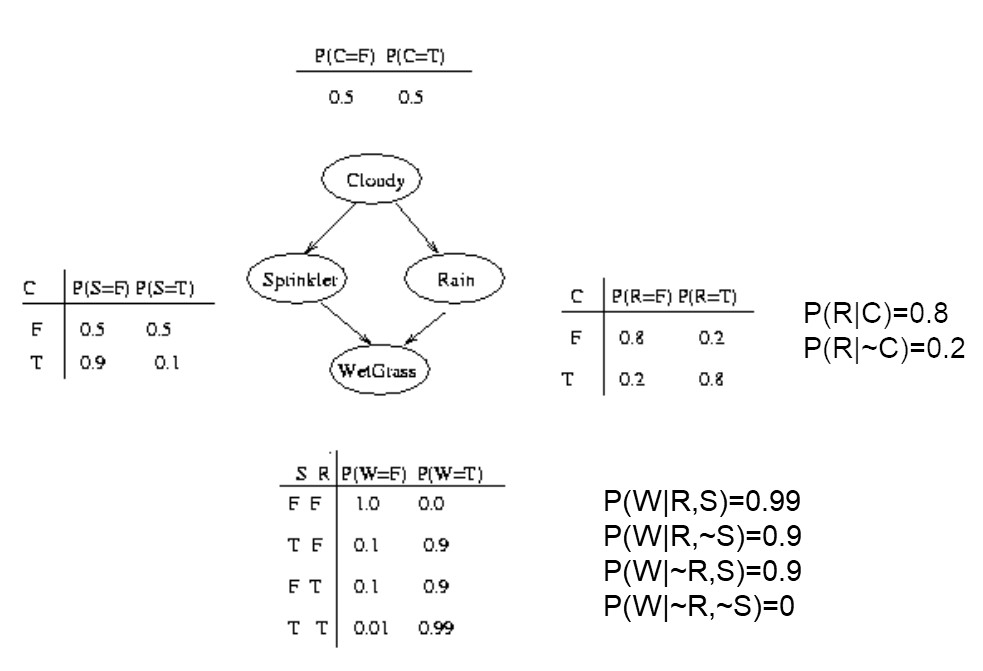

In [3]:
#Cloudy is having one random chance, it is mentioned as Discrete 
a = DiscreteDistribution({'1': 5./10, '0': 5./10})
#The other variables are dependent on one or more variables -> Conditional table is used.
b = ConditionalProbabilityTable(
        [[ '0', '0', 0.5 ],
         [ '0', '1', 0.9 ],
         [ '1', '0', 0.5 ],
         [ '1', '1', 0.1 ]],[a]) 

d = ConditionalProbabilityTable(
        [[ '0', '0', 0.8 ],
         [ '0', '1', 0.2 ],
         [ '1', '0', 0.2 ],
         [ '1', '1', 0.8 ]],[a]) 

e = ConditionalProbabilityTable(
        [[ '0', '0', '1', 0.0 ],
         [ '0', '1', '1', 0.9 ],
         [ '1', '0', '1', 0.9 ],
         [ '1', '1', '1', 0.99 ],
         [ '0', '0', '0', 1.0 ],
         [ '0', '1', '0', 0.1 ],
         [ '1', '0', '0', 0.1 ],
         [ '1', '1', '0', 0.01 ]],[b,d]) 
 

Pass these distributions into state objects along with the name for the node.

In [4]:
# State objects hold both the distribution, and a high level name.
Cloudy = State(a, name="Cloudy")
Sprinkler = State(b, name="Sprinkler")
Rain = State(d, name="Rain")
wetGrass = State(e, name="wetGrass")

Add the states to the network.

In [5]:
# Create the Bayesian network object with a useful name
model = BayesianNetwork("wetGrass?")

# Add the four states to the network 
model.add_states(Cloudy, Sprinkler, Rain, wetGrass)

Then we need to add edges to the model. The edges represent which states are parents of which other states.

In [6]:
# Add edges which represent conditional dependencies, where the second node is 
# conditionally dependent on the first node (wetGrass is dependent on both Rain and Sprinkler)
model.add_edge(Cloudy, Sprinkler)
model.add_edge(Cloudy, Rain)
model.add_edge(Sprinkler, wetGrass)
model.add_edge(Rain, wetGrass)

Lastly, the model must be baked to finalize the internals.

In [7]:
model.bake()

## Calculating the Probabilities

To calculate the conditional probabilities provide the values of nodes that are known and it will predict probabilities for all other nodes. 

For this assignment, we need to compute the probability that the grass is wet due to sprinklers when it is cloudy outside.
The calculation of P(W|S, C). In this we know that Sprinkler (S) takes the value 1 and Cloudy (C) takes the value 1. So we provide this to our function. Based on this it will return us an array with probabilities for all the different values for all the nodes. In our case we are concerned only with the probability of wetGrass (W) taking the value 1 which has index 3 considering indexing from 0. So we select the 3rd index of the array and parameter as 1 to get that particular probability which turns out to be 0.972.


In [8]:
#a P(W|S, C)
round(model.predict_proba([{'Cloudy': '1', 'Sprinkler' : '1'}])[0][3].parameters[0]['1'],4)

0.972